# 의사 결정 나무

의사 결정 나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있다. 여기에서는 의사 결정 나무로 분류 문제를 푸는 법을 설명한다.

## 의사 결정 나무의 분류 방법

의사 결정 나무의 분류 방법은 다음과 같다.

1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)을 정한다. 이를 분류 규칙이라고 한다. 최적의 분류 규칙을 찾는 방법은 이후에 자세히 설명한다.
2. 전체 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 1)과 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드 2)으로 나눈다. 
3. 각각의 자식 노드에 대해 1~2의 단계를 반복하여 하위의 자식 노드를 만든다. 단, 자식 노드에 한가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.

이렇게 자식 노드 나누기를 연속적으로 적용하면 노드가 계속 증가하는 나무(tree)와 같은 형태로 표현할 수 있다.

## 의사 결정 나무를 사용한 예측

이렇게 만들어진 의사 결정 나무를 이용하여 테스트 데이터의 클래스를 예측하려면 가장 상위의 노드부터 분류 규칙을 적용하여 하위의 자식 노드를 선택한다. 가장 마지막에 선택된 노드에 있는 데이터의 클래스의 비율을 조사하여 가장 데이터 수가 많은 클래스를 그 노드의 대표 클래스 즉, 클래스 예측값이 된다.

##  규칙 결정 방법

규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립 변수와 기준값을 찾는 것이다. 이러한 기준을 정량화한 것이 정보 획득량(information gain)이다. 기본적으로 모든 독립 변수와 모든 가능한 기준값에 대해 정보 획득량을 구하여 가장 정보 획득량이 큰 독립 변수와 기준값을 선택한다.

## 정보 획득량

정보 획득량(information gain)는 $X$라는 조건에 의해 확률 변수 $Y$의 엔트로피가 얼마나 감소하였는가를 나타내는 값이다. 다음처럼 $Y$의 엔트로피에서 $X$에 대한 $Y$의 조건부 엔트로피를 뺀 값으로 정의된다. 

$$ IG[Y,X] = H[Y] - H[Y|X] $$ 

예를 들어 다음과 같은 두가지 경우를 생각하자.

<img src="https://datascienceschool.net/upfiles/50d9204d21e840a3915d941667843c78.png" style="width:70%; margin: 0 auto 0 auto;">



A 방법과 B 방법 모두 노드 분리 전에는 Y=0 인 데이터의 수와 Y=1 인 데이터의 수가 모두 40개였다. 

A 방법으로 노드를 분리하면 다음과 같은 두 개의 자식 노드가 생긴다.
* 자식 노드 A1은 Y=0 인 데이터가 30개, Y=1 인 데이터가 10개 
* 자식 노드 A2은 Y=0 인 데이터가 10개, Y=1 인 데이터가 30개 

B 방법으로 노드를 분리하면 다음과 같은 두 개의 자식 노드가 생긴다.
* 자식 노드 B1은 Y=0 인 데이터가 20개, Y=1 인 데이터가 40개 
* 자식 노드 B2은 Y=0 인 데이터가 20개, Y=1 인 데이터가 0개 

우선 부모 노드의 엔트로피를 계산하면 다음과 같다.


$$ H[Y] = -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) = \dfrac{1}{2} + \dfrac{1}{2}  = 1 $$


A 방법에 대해 IG를 계산하면 다음과 같다.

$$ H[Y|X=X_1] = -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right) = 0.81 $$

$$ H[Y|X=X_2] = -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right)  -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) = 0.81 $$

$$ H[Y|X] = \dfrac{1}{2} H[Y|X=X_1] + \dfrac{1}{2} H[Y|X=X_2] = 0.81 $$

$$ IG = H[Y] - H[Y|X] = 0.19 $$ 

B 방법에 대해 IG를 계산하면 다음과 같다.

$$ H[Y|X=X_1] = -\dfrac{1}{3}\log_2\left(\dfrac{1}{3}\right) - \dfrac{2}{3}\log_2\left(\dfrac{2}{3}\right) = 0.92 $$

$$ H[Y|X=X_2] = 0 $$

$$ H[Y|X] = \dfrac{3}{4} H[Y|X=X_1] + \dfrac{1}{4} H[Y|X=X_2] = 0.69 $$

$$ IG = H[D] - H[Y|X] = 0.31 $$ 

따라서 B 방법이 더 나은 방법임을 알 수 있다.

## Scikit-Learn의 의사 결정 나무 클래스

Scikit-Learn에서 의사 결정 나무는 `DecisionTreeClassifier` 클래스로 구현되어있다. 여기에서는 붓꽃 분류 문제를 예롤 들어 의사 결정 나무를 설명한다. 이 예제에서는 독립변수 공간을 공간상에 표시하기 위해 꽃받침의 길이와 폭만을 독립변수로 사용하였다.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

다음은 의사 결정 나무를 시각화하기 위한 코드이다. `draw_decision_tree` 함수는 의사 결정 나무의 의사 결정 과정의 세부적인 내역을 다이어그램으로 보여주고  `plot_decision_regions` 함수는 이러한 의사 결정에 의해 데이터의 영역이 어떻게 나뉘어졌는지를 시각화하여 보여준다.

In [3]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

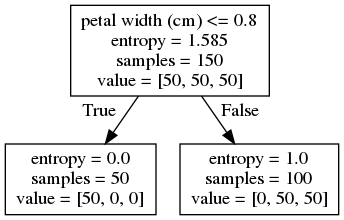

In [4]:
draw_decision_tree(tree1)

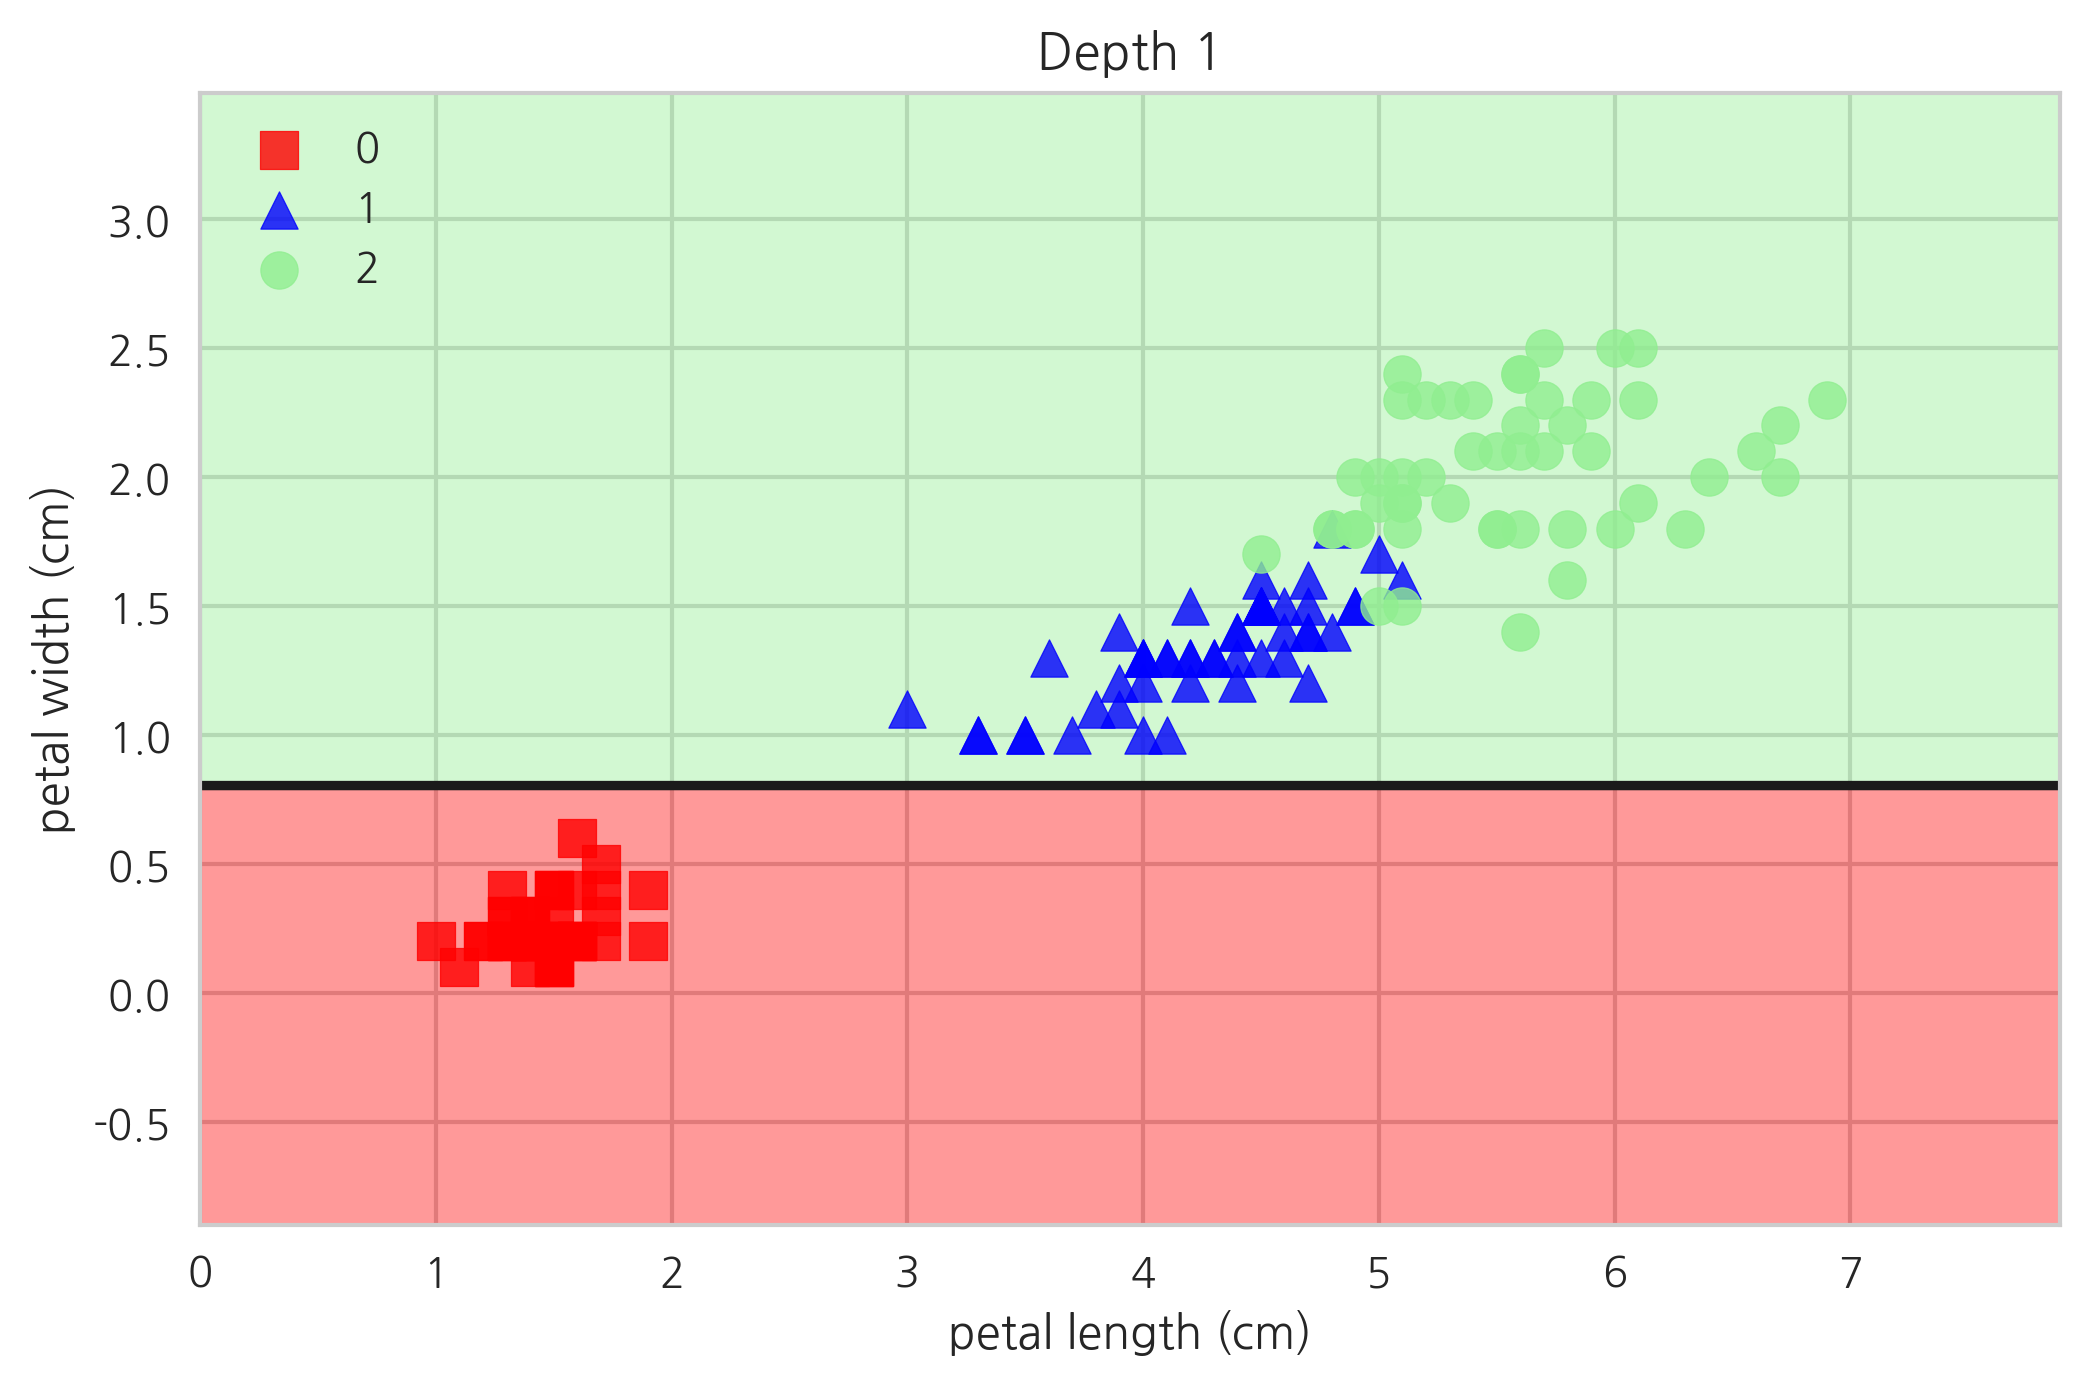

In [5]:
plot_decision_regions(X, y, tree1, "Depth 1")
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]])

In [7]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)

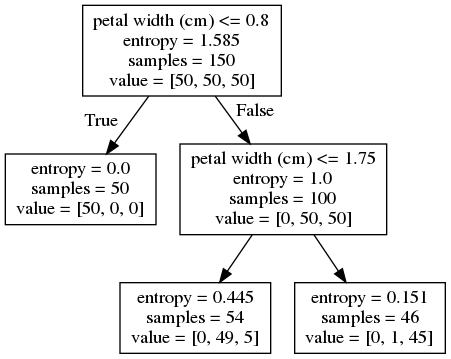

In [8]:
draw_decision_tree(tree2)

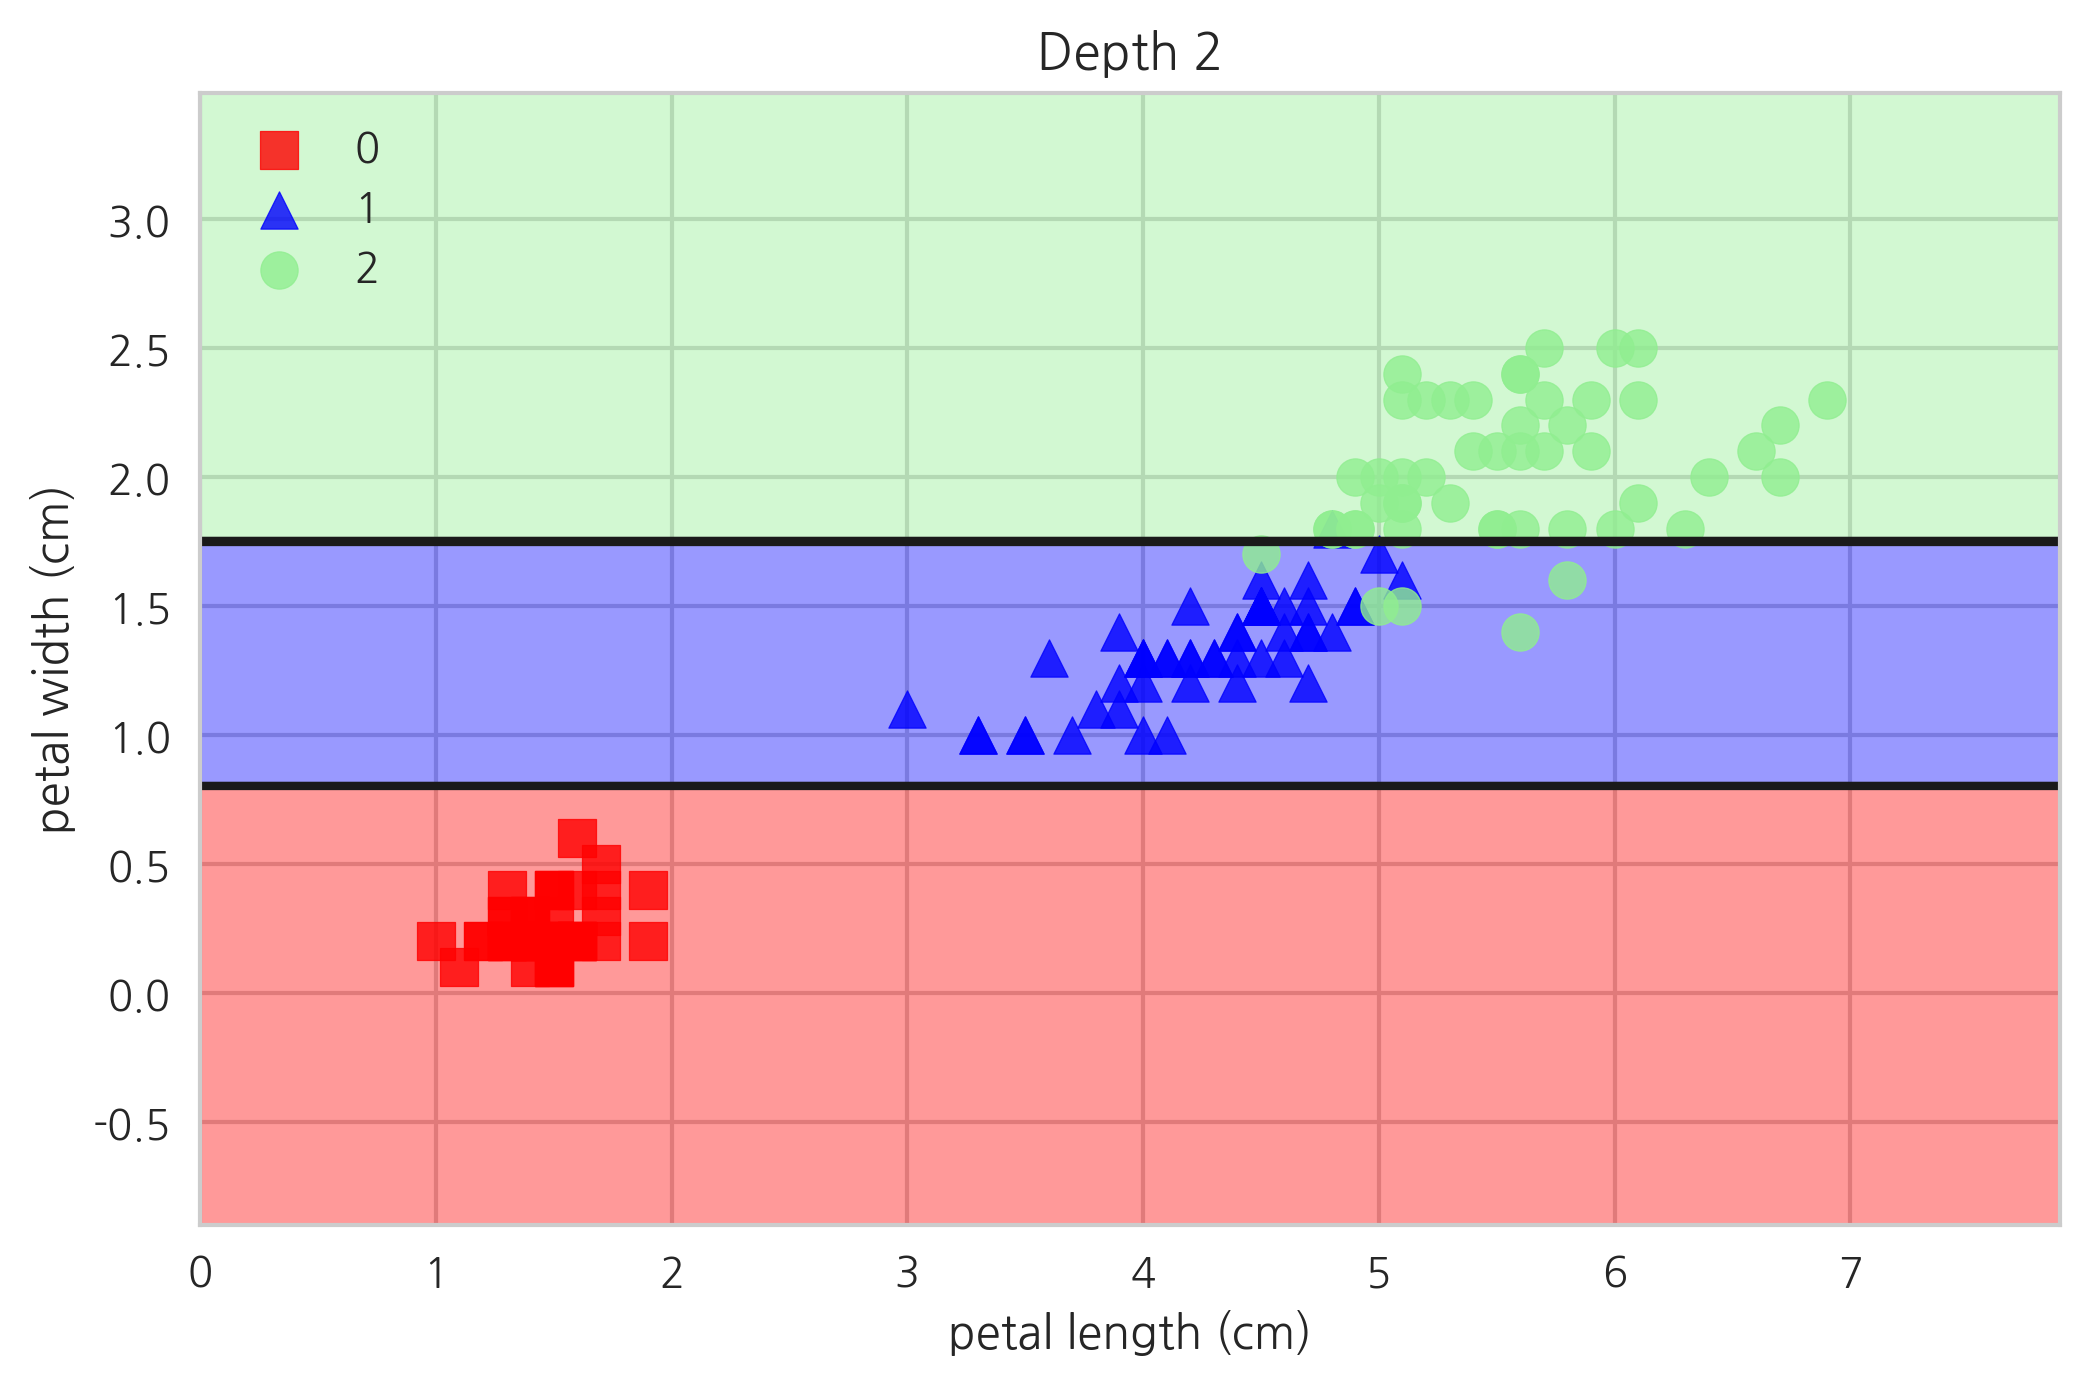

In [9]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.show()

In [10]:
confusion_matrix(y, tree2.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [11]:
tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

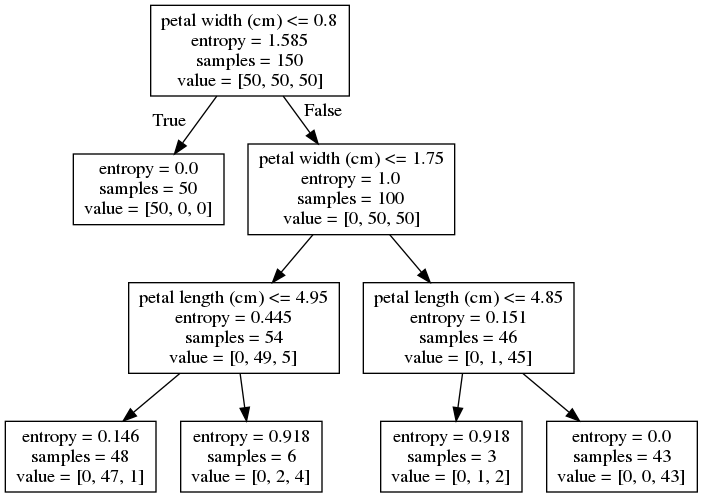

In [12]:
draw_decision_tree(tree3)

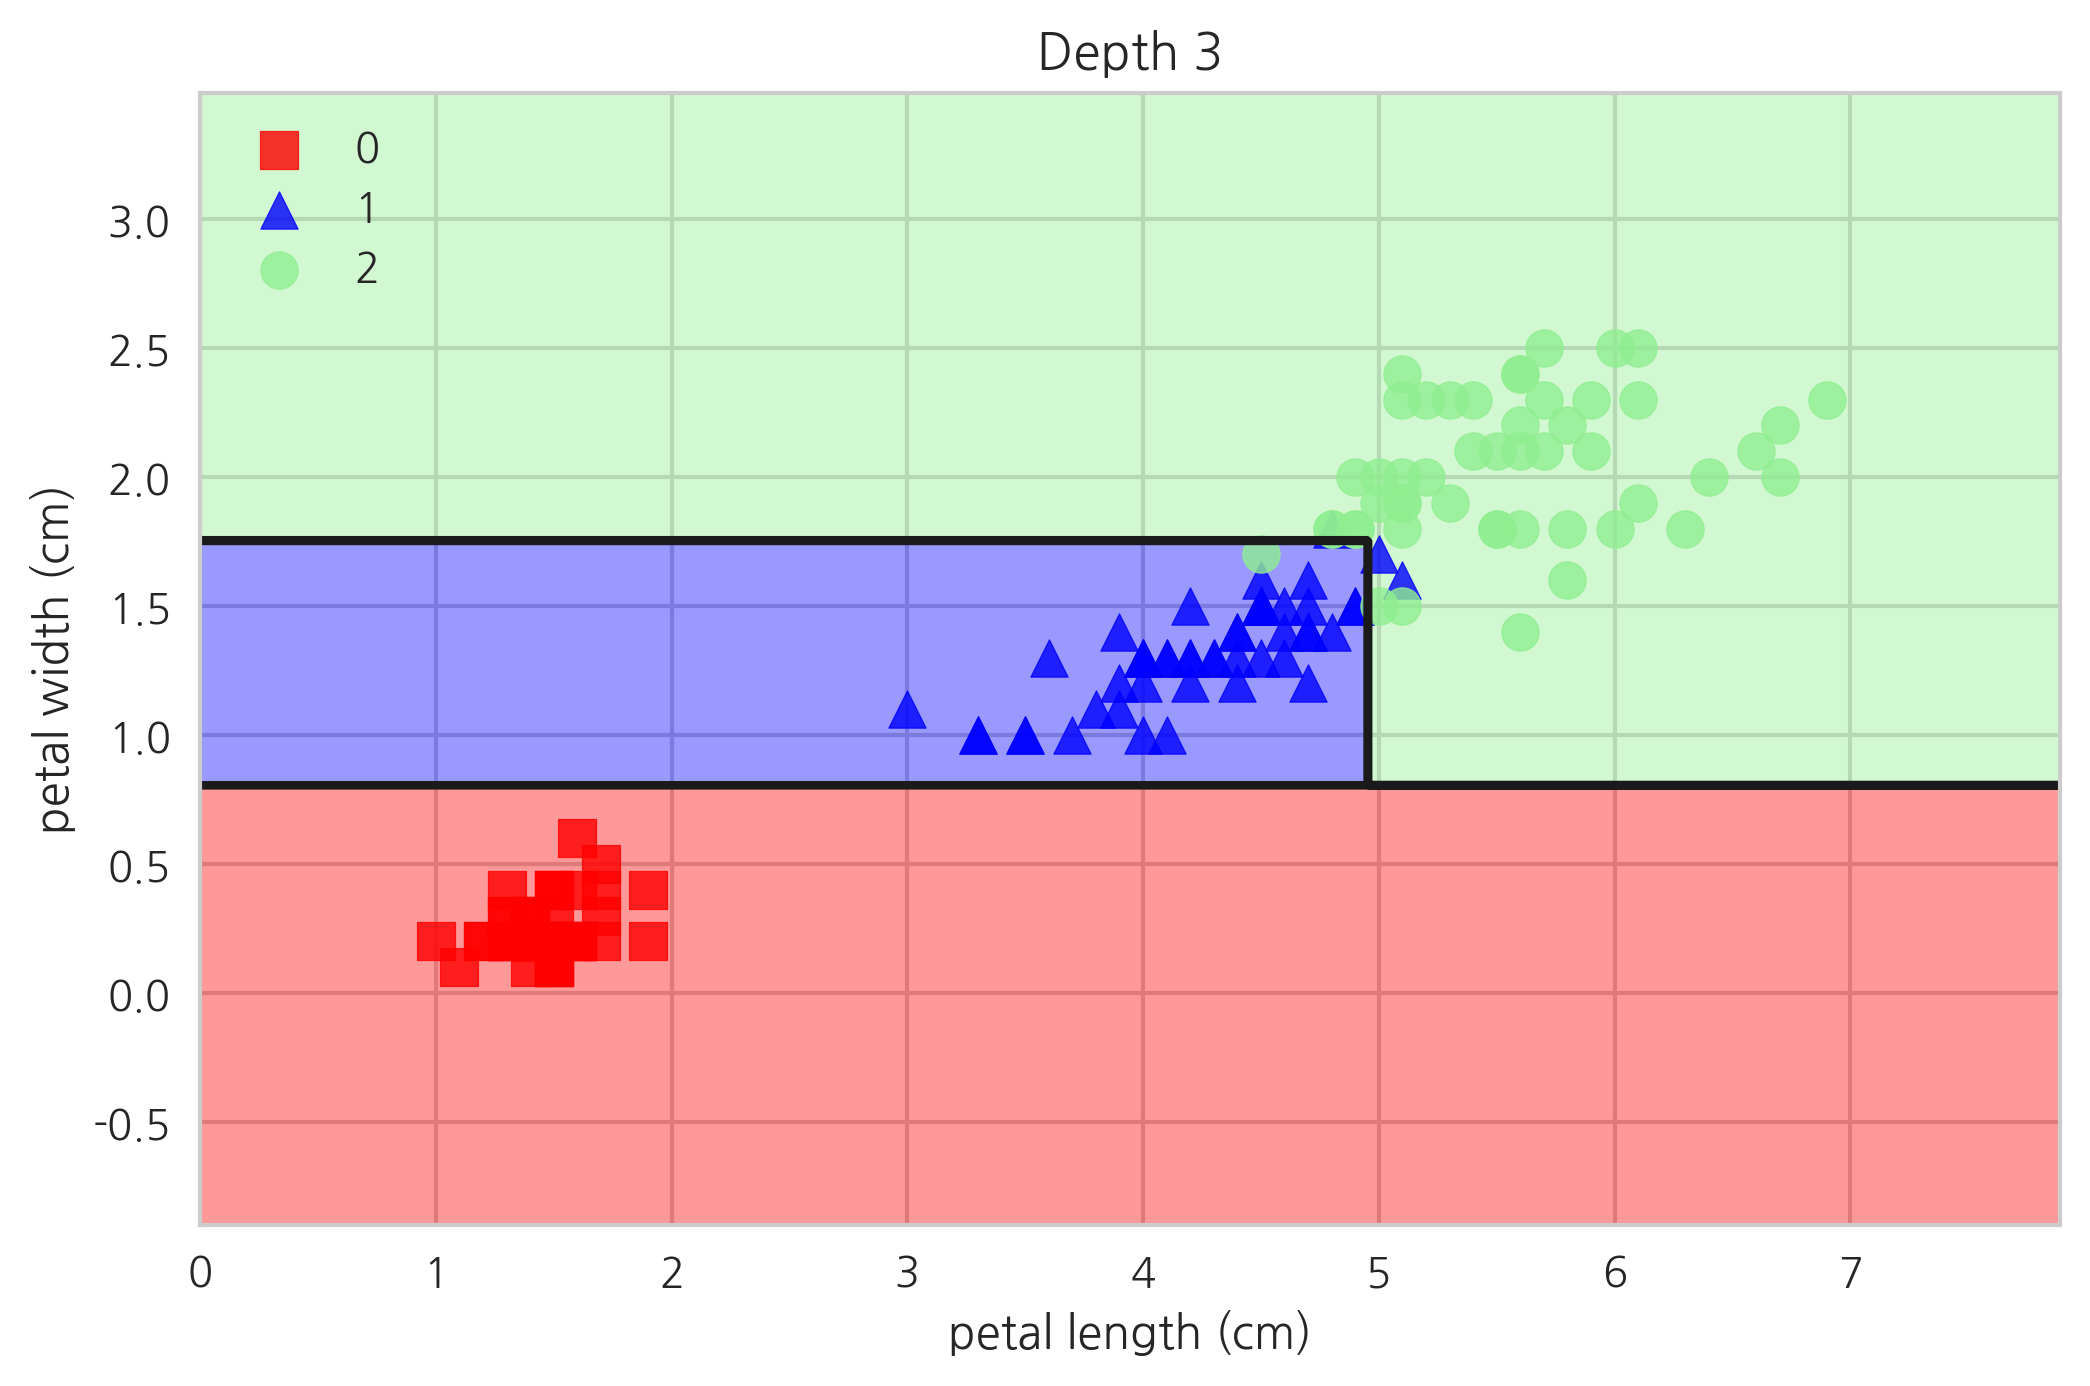

In [13]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.show()

In [14]:
confusion_matrix(y, tree3.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [15]:
tree4 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X, y)

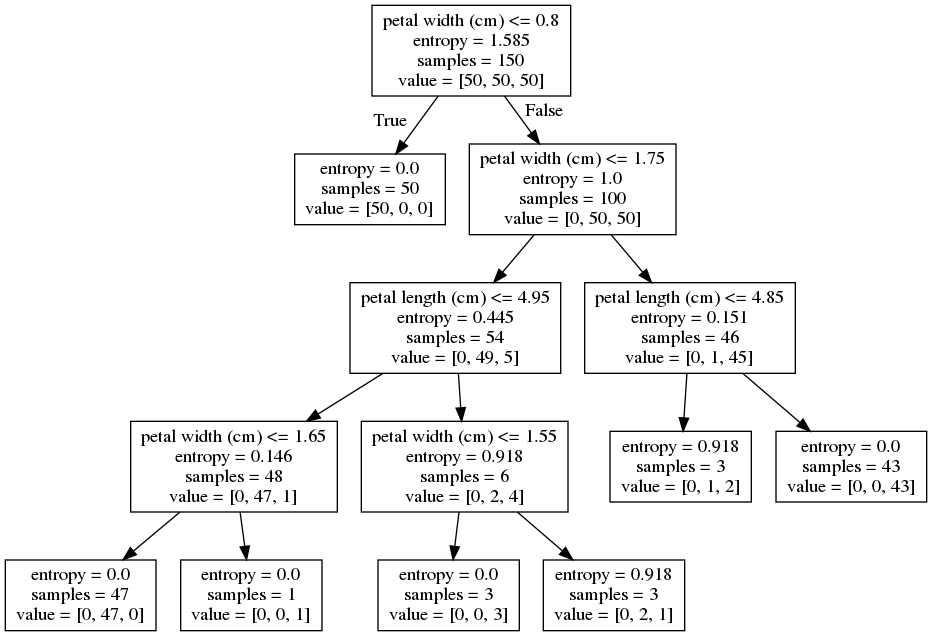

In [16]:
draw_decision_tree(tree4)

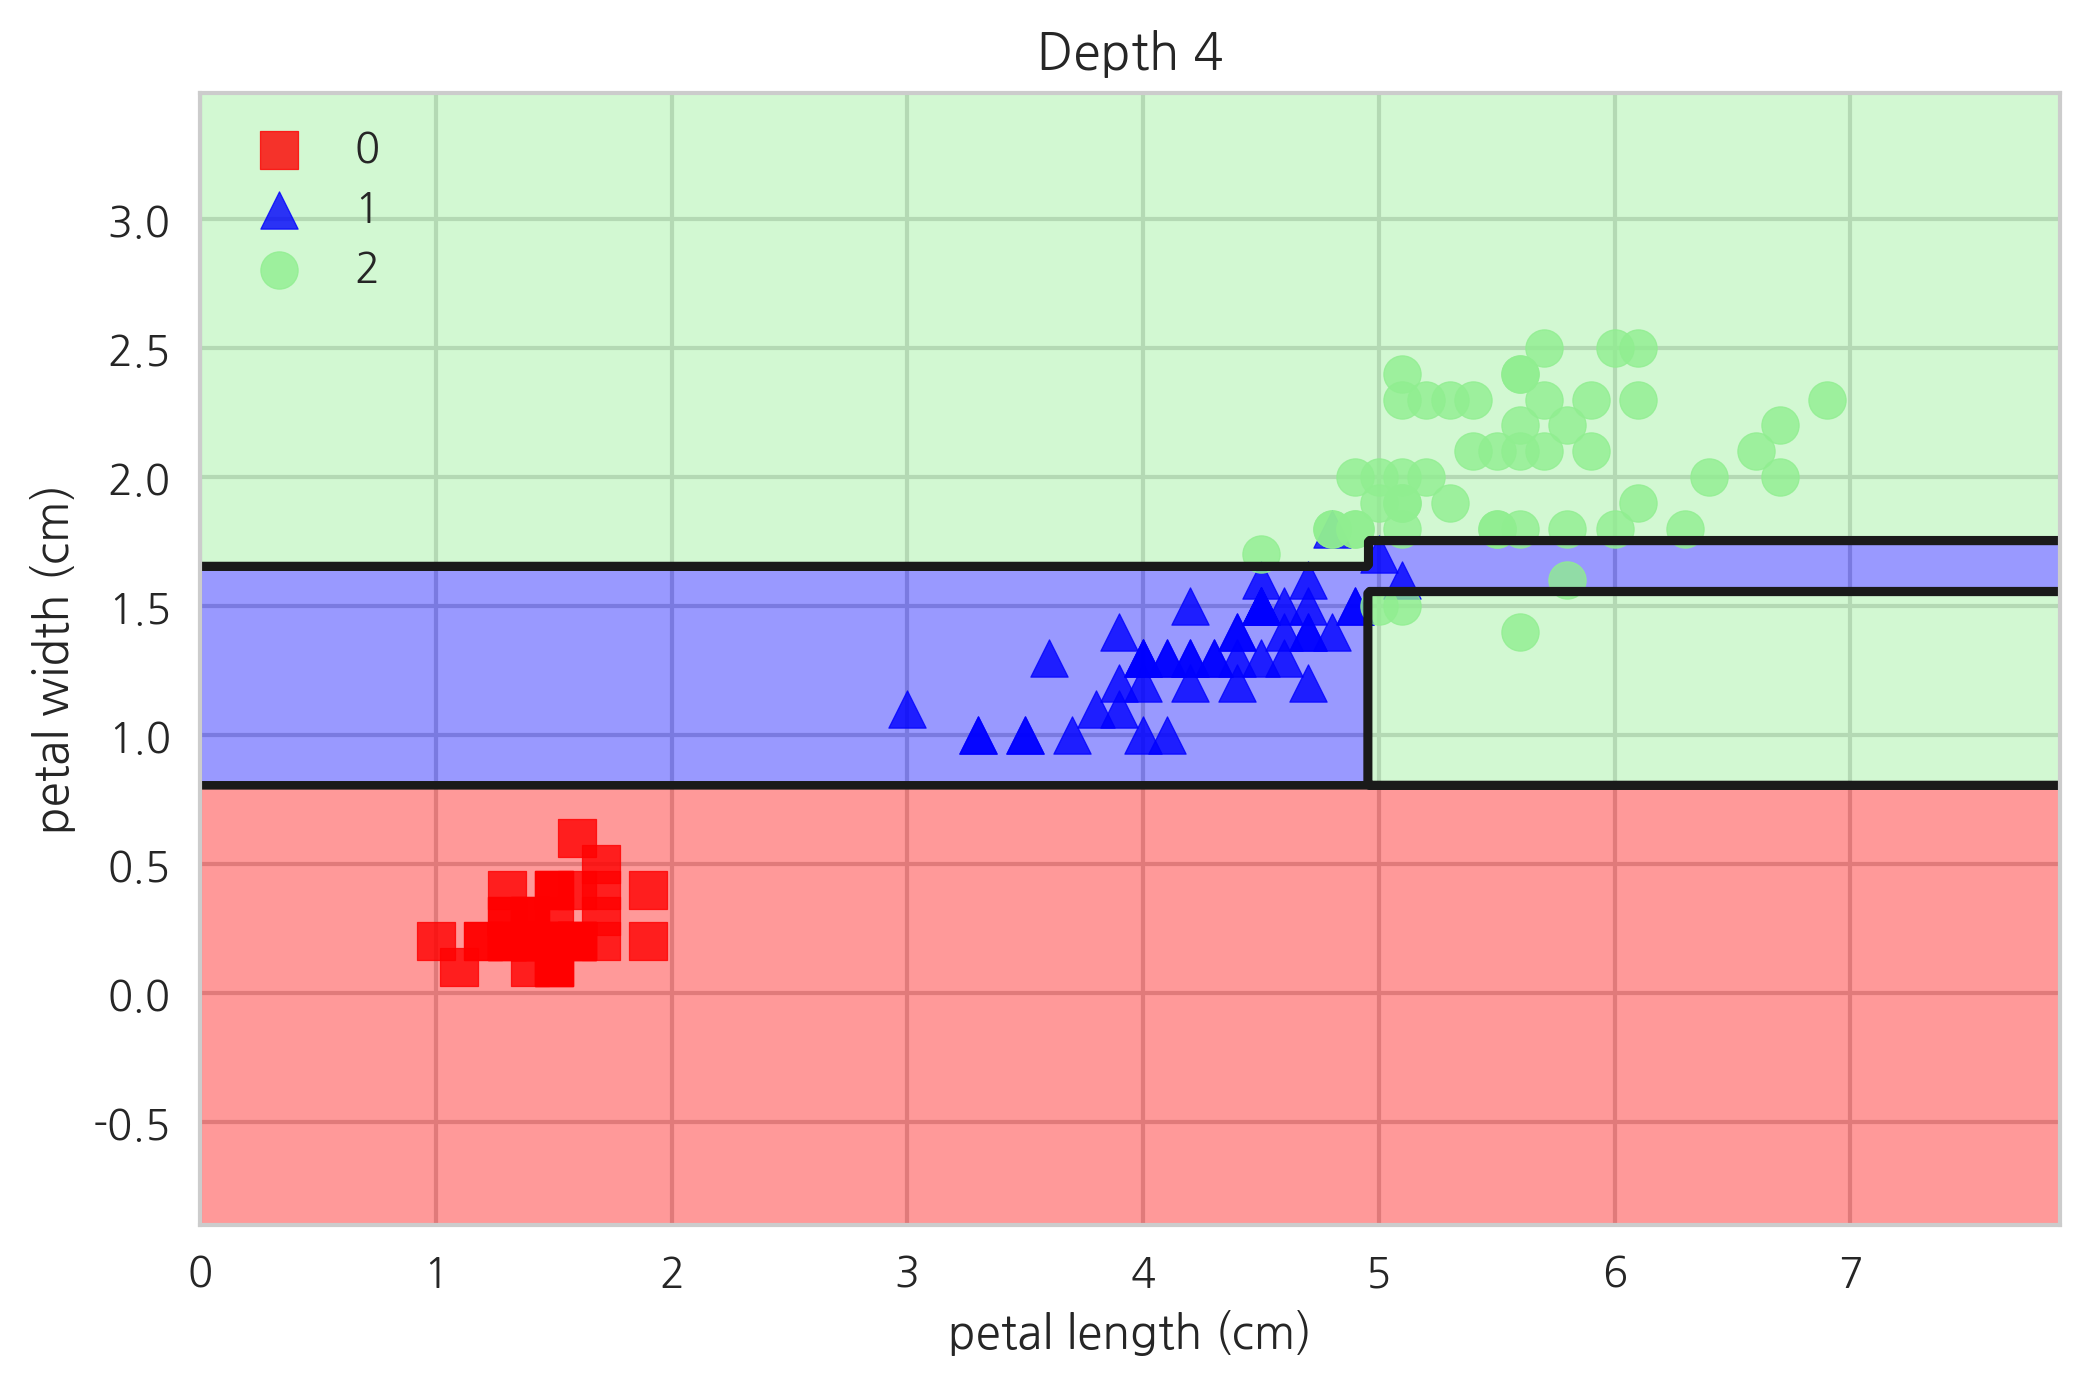

In [17]:
plot_decision_regions(X, y, tree4, "Depth 4")
plt.show()

In [18]:
confusion_matrix(y, tree4.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])

In [19]:
tree5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X, y)

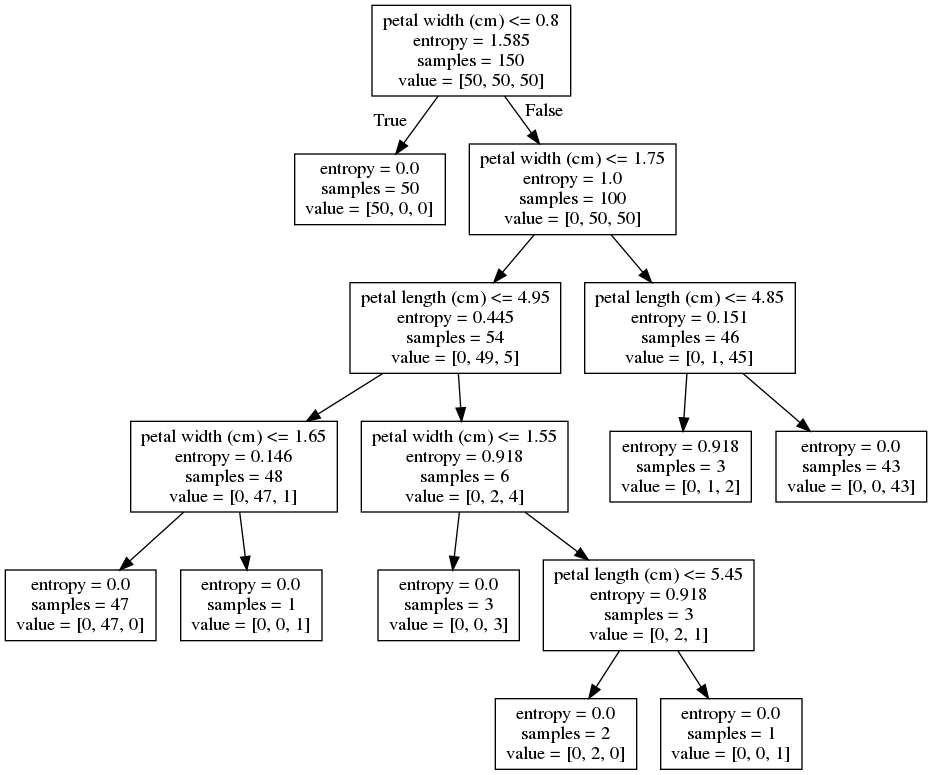

In [20]:
draw_decision_tree(tree5)

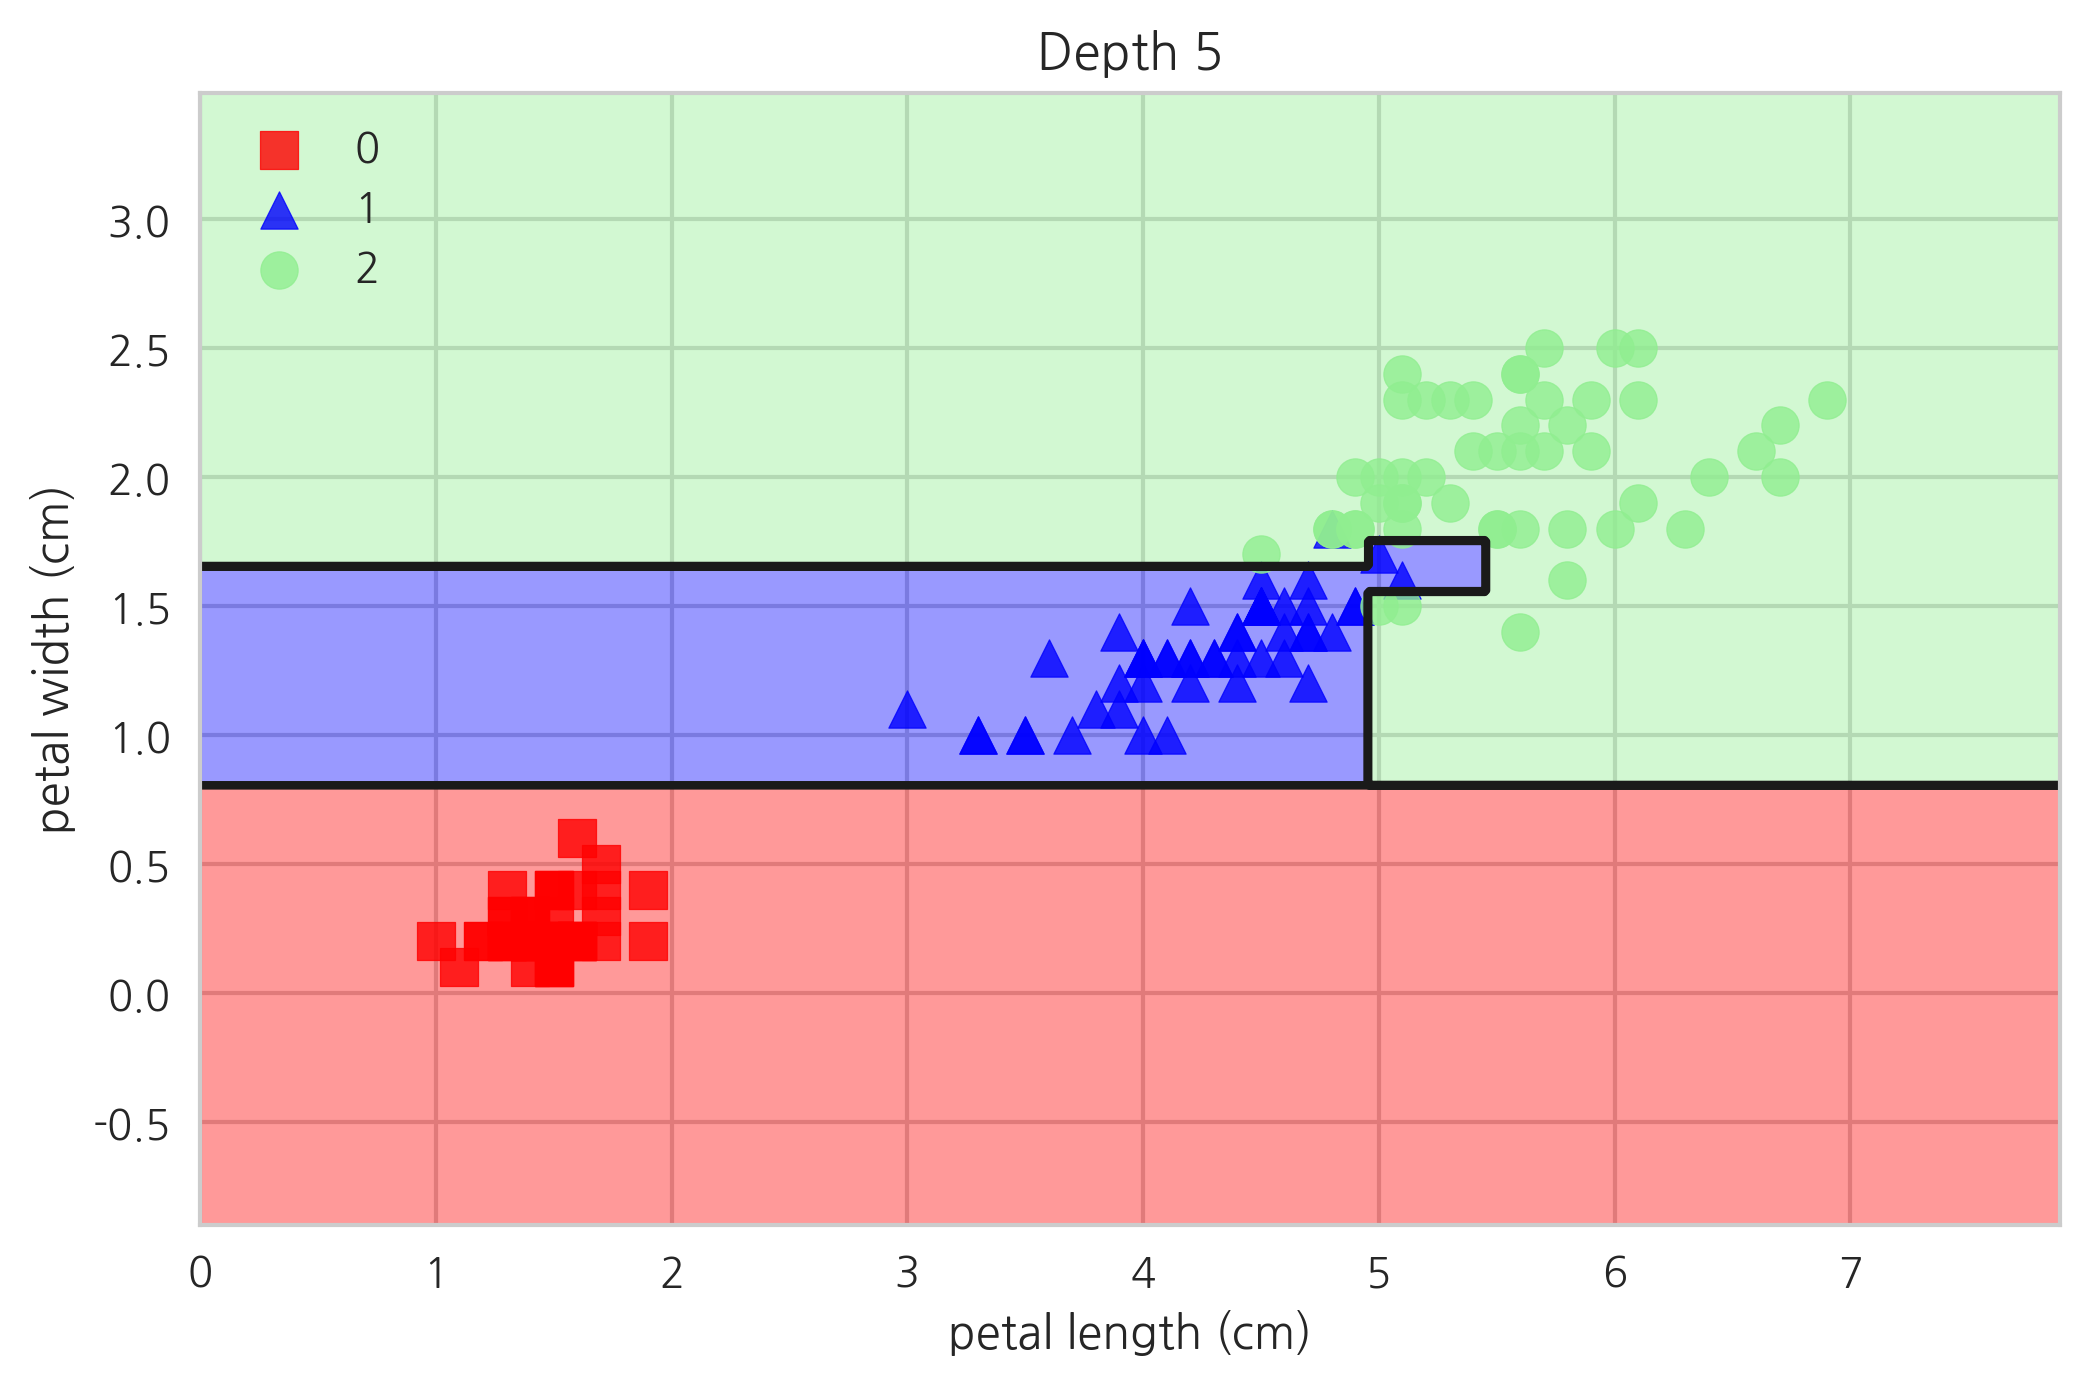

In [21]:
plot_decision_regions(X, y, tree5, "Depth 5")
plt.show()

In [22]:
confusion_matrix(y, tree5.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]])

#### 연습 문제 1

1. 붓꽃 분류 문제에서 꽃잎의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 accuracy 성능을 측정한다.
2. K=5 인 교차 검증을 통해 평균 accuracy 성능을 측정한다.
3. `max_depth` 인수를 바꾸어 가면서 가장 평균 accuracy 성능이 좋은 `max_depth` 인수를 찾아라.


2개의 독립 변수를 선택하는 여러가지 방법에 대해 성능을 비교하면 다음과 같다.

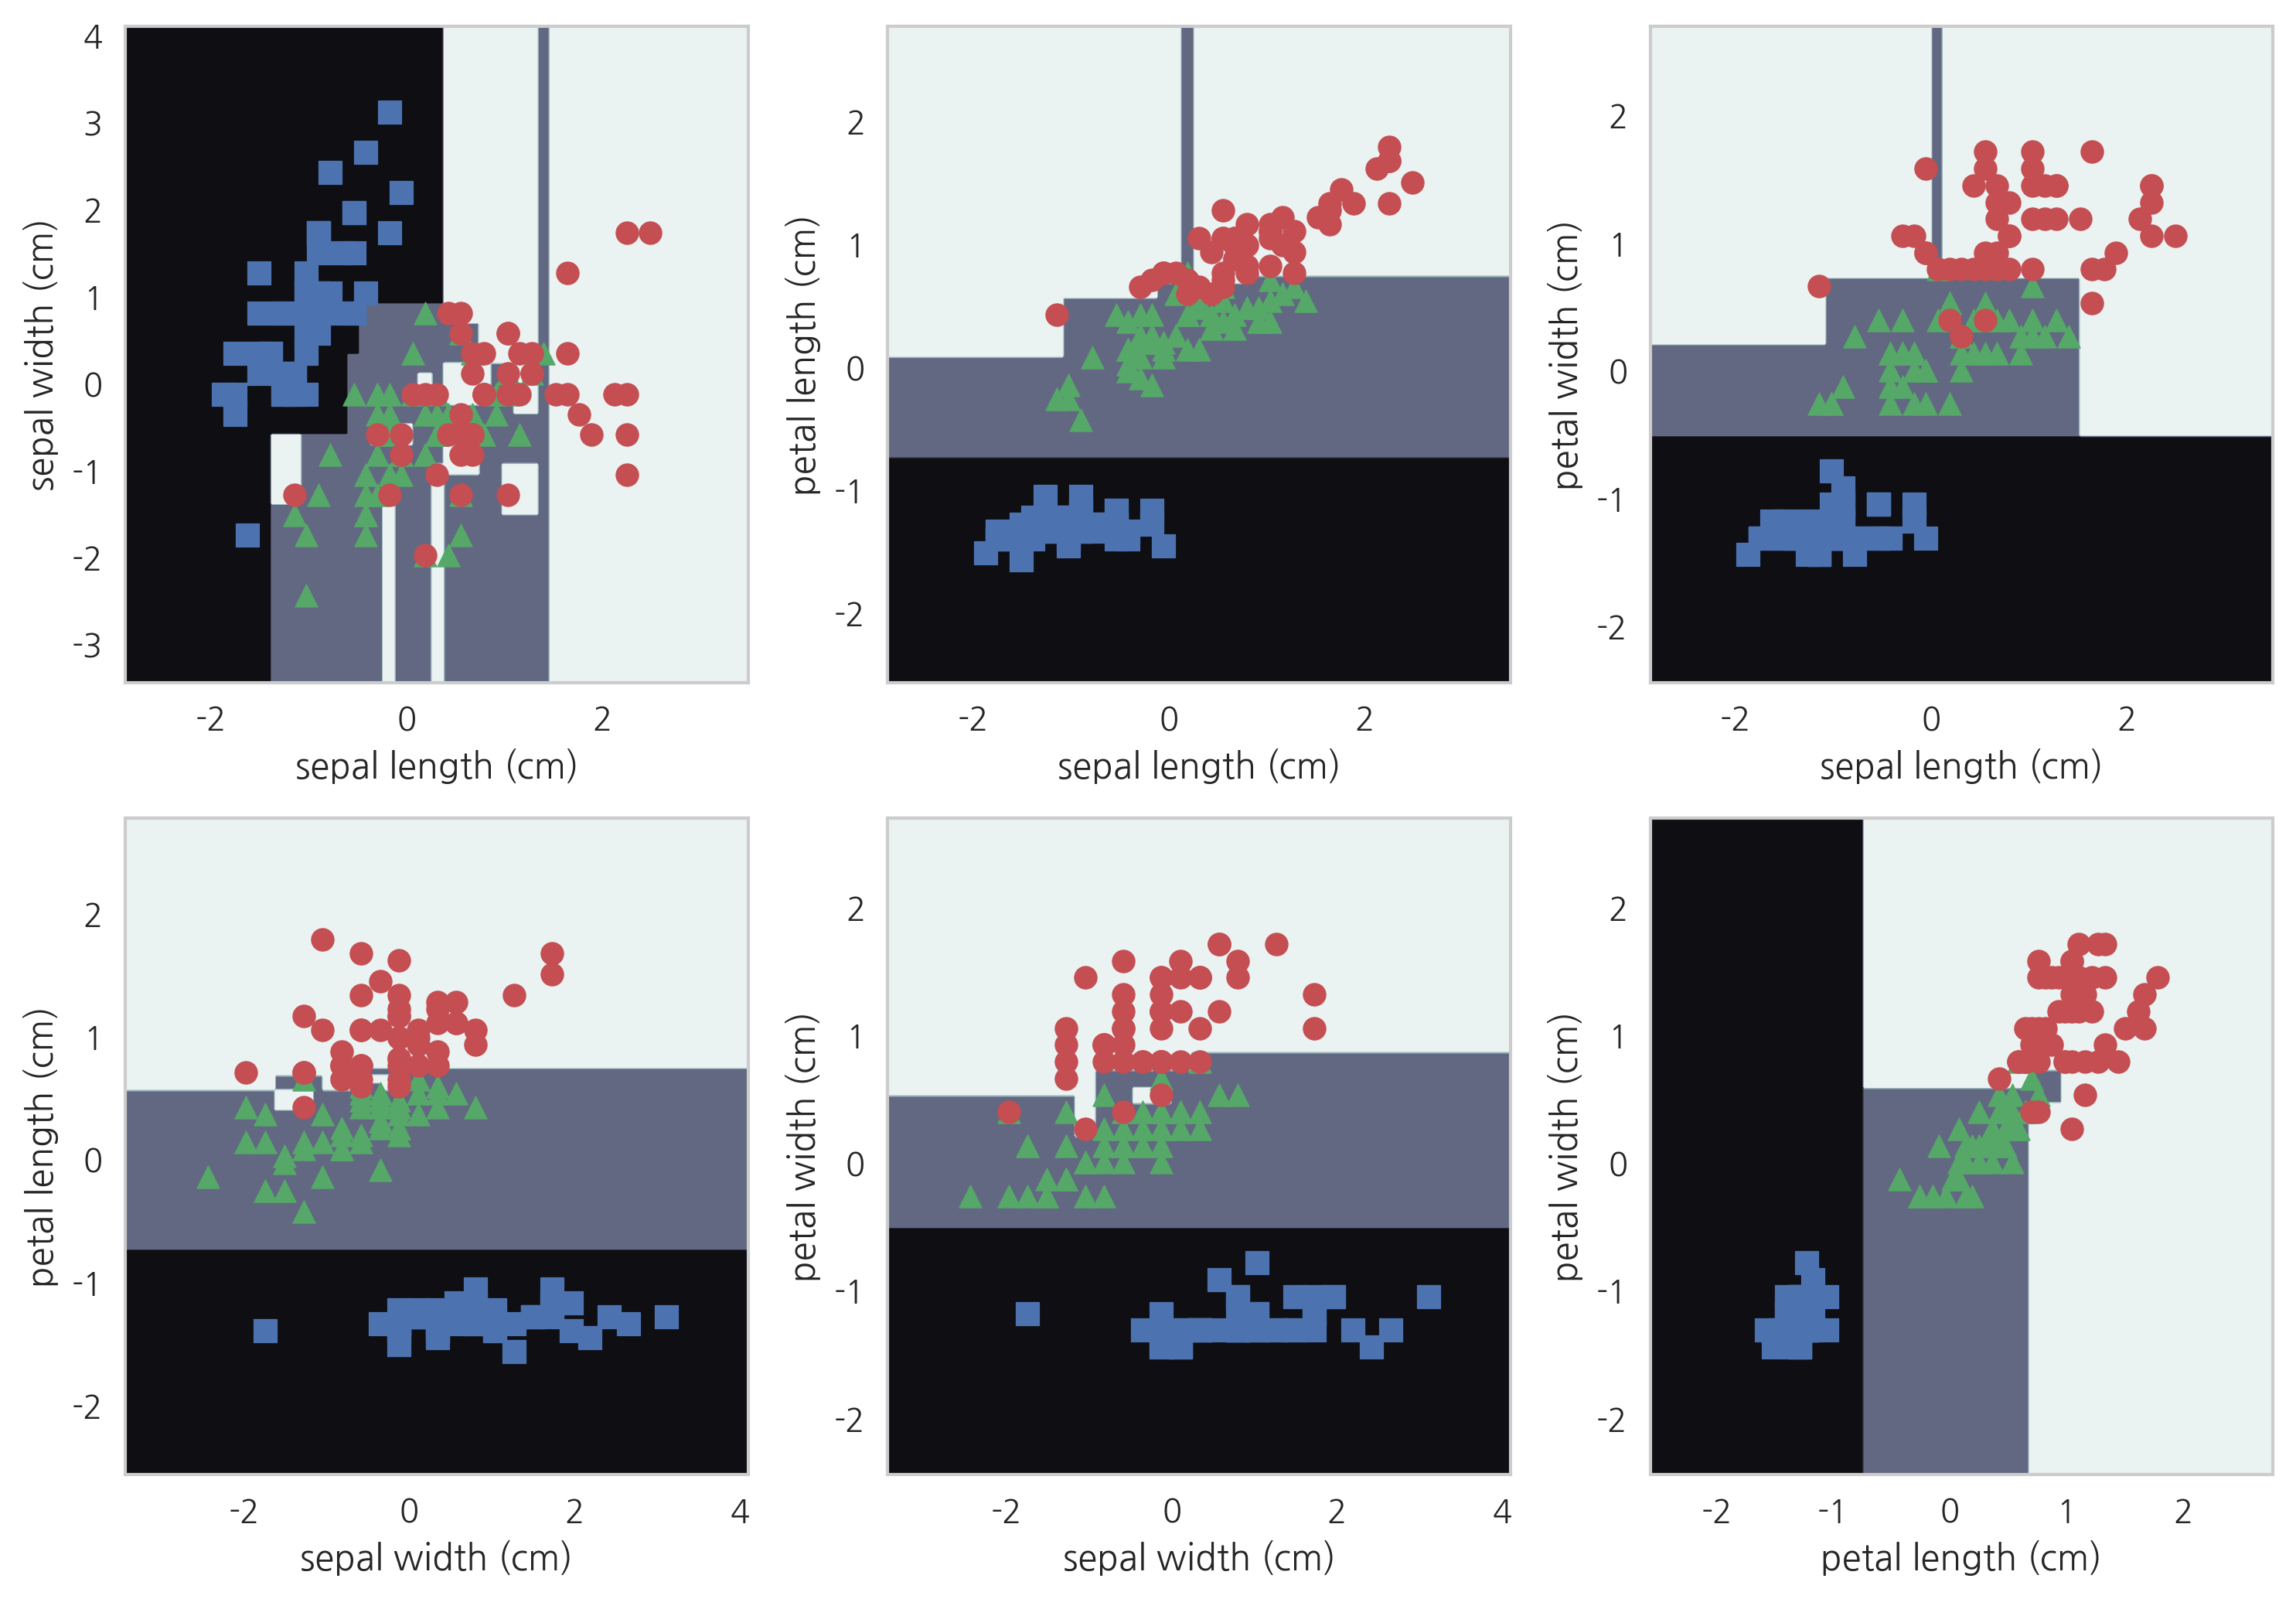

In [37]:
from itertools import combinations

n_classes = 3
markers = ('s', '^', 'o')
plot_step = 0.02

plt.figure(figsize=(10, 7))
for pairidx, pair in enumerate(combinations(range(4), 2)):
    X = iris.data[:, pair]
    y = iris.target
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model = DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.bone)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    for i, marker in zip(range(n_classes), markers):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], marker=marker, label=iris.target_names[i])
    plt.axis("tight")

plt.tight_layout()
plt.show()

## 타이타닉호 생존자 예측

In [24]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [26]:
from sklearn.preprocessing import LabelEncoder
dfX["sex"] = LabelEncoder().fit_transform(dfX["sex"])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [27]:
dfX["age"].fillna(dfX["age"].mean(), inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [28]:
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX["pclass"]), 
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)
del(dfX["pclass"])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

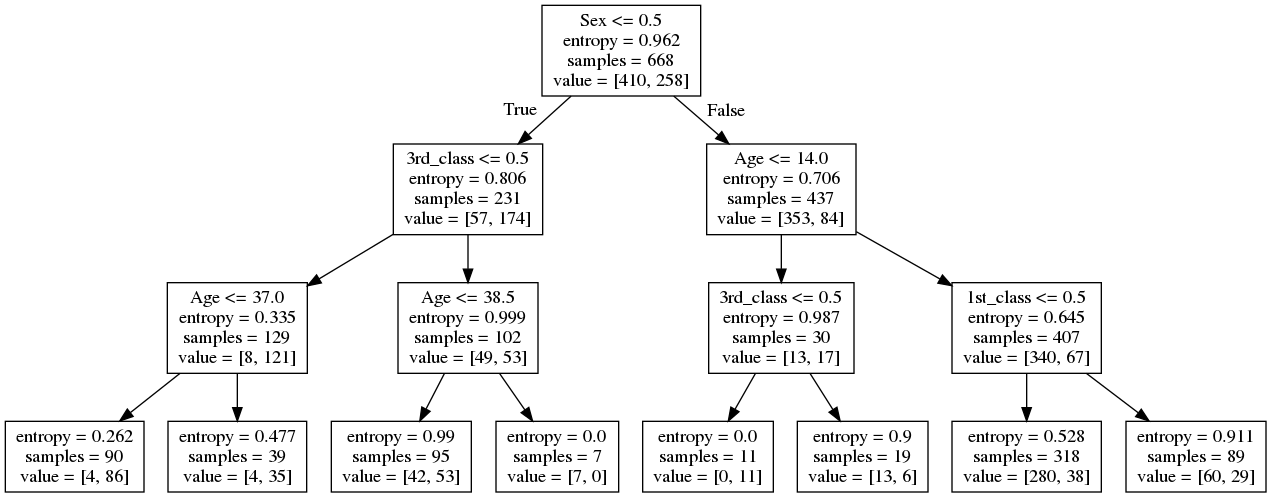

In [31]:
command_buf = io.StringIO() 
export_graphviz(model, out_file=command_buf, feature_names=['Age','Sex','1st_class','2nd_class','3rd_class']) 
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0] 
image = graph.create_png()
Image(image)

In [32]:
confusion_matrix(y_train, model.predict(X_train))

array([[360,  50],
       [ 73, 185]])

In [33]:
confusion_matrix(y_test, model.predict(X_test))

array([[119,  20],
       [ 25,  59]])

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       410
          1       0.79      0.72      0.75       258

avg / total       0.81      0.82      0.81       668



In [35]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       139
          1       0.75      0.70      0.72        84

avg / total       0.80      0.80      0.80       223



#### 연습 문제 2

1. breast cancer 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 기준은 무엇인가?

#### 연습 문제 3

1. MINIST digit 이미지 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 픽셀은 어디인가? 이 픽셀은 숫자들을 어떻게 구분하게 되며 왜 그렇게 구분지어지는지 생각하라.